In [6]:
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

# single file
fpath = 'C:/Master/data/cmems_data/global_10km/phys_001.nc'
fpath = 'C:/Master/data/cmems_data/global_10km/2016/full/phys_001.nc'
ds = xr.open_dataset(fpath)
sst = ds.thetao
ssl = ds.zos
lon = ds.longitude
lat = ds.latitude

uvel = ds.uo.squeeze(axis=1)
vvel = np.squeeze(ds.vo, axis=1)

len(lon)

1441

In [13]:
x = np.array([[[]]])
a = [[1,2,3],[4,5,6],[7,8,9]]

x = np.append(x, a, axis=0)
x

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 3 dimension(s) and the array at index 1 has 2 dimension(s)

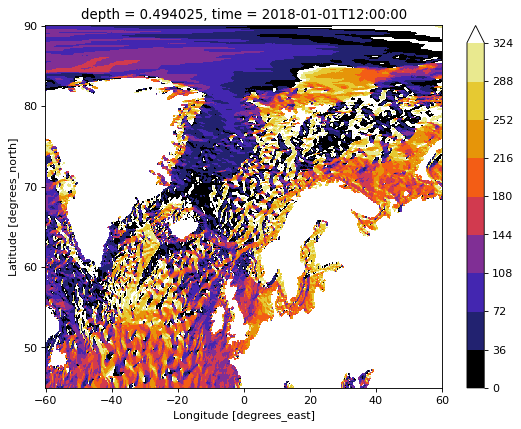

In [2]:
u = ds['uo'][0][0]
v = ds['vo'][0][0]

with np.errstate(all='ignore'):
    phase_angle = xr.ufuncs.rad2deg( xr.ufuncs.arctan2(v, u) ) + 180
    
fig=plt.figure(figsize=(8,6), dpi= 80, facecolor='w', edgecolor='w')
levels = np.arange(0,360,36)
phase_angle.plot(cmap='CMRmap', levels=levels)#, xlim=[-1,-0.3], ylim=[64.7, 65.8])

(50, 51.4)

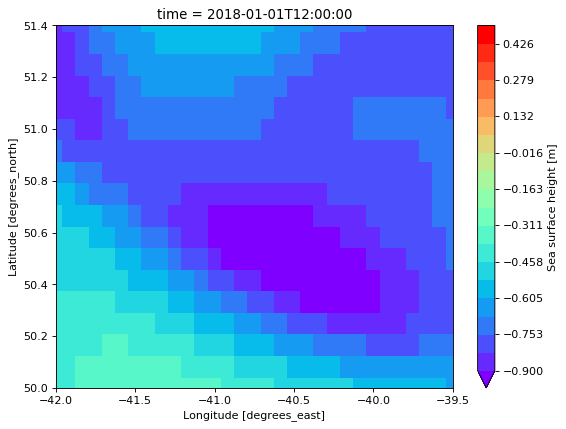

In [25]:
fig=plt.figure(figsize=(8,6), dpi= 80, facecolor='w', edgecolor='w')
levels = np.linspace(-0.9, 0.5, 20)
ssl.plot(cmap='rainbow', levels=levels)
plt.xlim(-42,-39.5)
plt.ylim(50, 51.4)

(55, 56.4)

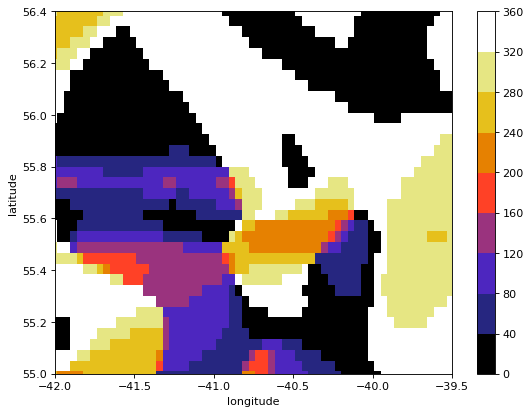

In [28]:
from scipy.interpolate import interp2d
from scipy.interpolate import griddata
import cv2

latNew = np.linspace(lat[0], lat[-1], lat.size*2)
lonNew = np.linspace(lon[0], lon[-1], lon.size*2)

u = ds['uo'][0][0]
v = ds['vo'][0][0]
u_new = cv2.resize(u.values, dsize=(lonNew.size, latNew.size), interpolation=cv2.INTER_CUBIC)
u_new = xr.Dataset({'u_new': (('latitude', 'longitude'), u_new)}).u_new
u_new['latitude'], u_new['longitude']  = latNew, lonNew; 
v_new = cv2.resize(v.values, dsize=(lonNew.size, latNew.size), interpolation=cv2.INTER_CUBIC)
v_new = xr.Dataset({'v_new': (('latitude', 'longitude'), v_new)}).v_new
v_new['latitude'], v_new['longitude']  = latNew, lonNew; 

with np.errstate(all='ignore'):
    phase_angle_interp = xr.ufuncs.rad2deg( xr.ufuncs.arctan2(v_new, u_new) ) + 180

fig=plt.figure(figsize=(8,6), dpi= 80, facecolor='w', edgecolor='w')
phase_angle_interp.plot(cmap='CMRmap', levels=10)#, levels=levels, xlim=[-1,-0.3], ylim=[64.7, 65.8])
plt.xlim(-42,-39.5)
plt.ylim(55, 56.4)

In [19]:
x = 325
while (x%9) != 0:
    x = x-1
print(x)

324


In [23]:
a = [5, 6, 7]
b = a[:]
#b.insert(0, -4:a[0])
range(a[0]-4, a[-1]+5)

range(1, 12)

In [6]:
from scipy.interpolate import interp2d
from scipy.interpolate import griddata
import cv2
x = np.array([[[0.0,1.0],[4.0,5.0]],[[4.0,5.0],[0.0,1.0]]], dtype='float32')
y = np.array([[[2.0,2.0],[2.0,2.0]],[[4.0,4.0],[4.0,4.0]]], dtype='float32')
#test = np.array([cv2.resize(x[:i,:], dsize=(4, 4), interpolation=cv2.INTER_CUBIC) for i in range(x)])
#test = cv2.resize(x, dsize=(4,4), interpolation=cv2.INTER_CUBIC)
test = [x, y]

for i,d in enumerate(test):
    test[i] = np.array([cv2.resize(x[j], dsize=(4, 4), interpolation=cv2.INTER_CUBIC) for j in range(i)])
print(test[0])
print(y)

[]
[[[2. 2.]
  [2. 2.]]

 [[4. 4.]
  [4. 4.]]]


In [7]:
def dim(a):
    if not type(a) == list:
        return []
    return (len(a)) + dim(a[0])

def find_max_dim(a):
    return max( [dim(i) for i in a] )


x = np.array([[[[0.0,1.0],[4.0,5.0]],[[4.0,5.0],[0.0,1.0]]]], dtype='float32')
#x.shape
#x = [[[0.0,1.0],[4.0,5.0]],[[4.0,5.0],[0.0,1.0]]]

#x = [[0,1,2],[3,4]]

find_max_dim(x)

[]

SyntaxError: invalid syntax (<ipython-input-18-95dff029a5bf>, line 1)

(62, 66)

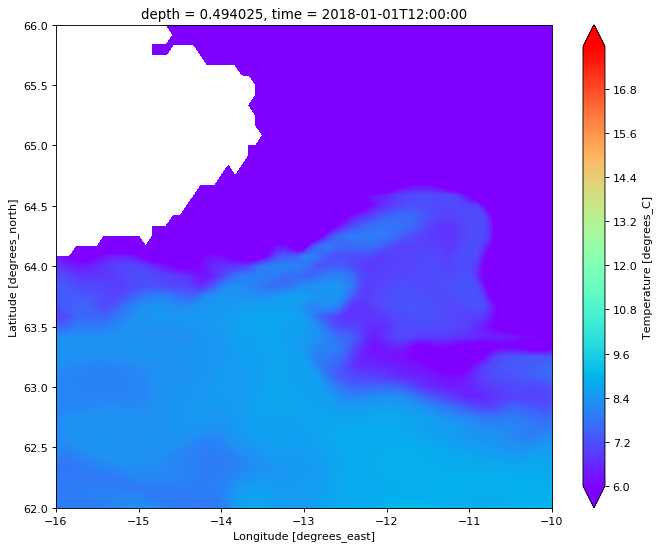

In [9]:
fig=plt.figure(figsize=(10,8), dpi= 80, facecolor='w', edgecolor='w', )
levels = np.arange(6,18,0.05)
sst[0,0].plot.contourf(add_colorbar=True, levels=levels, cmap='rainbow', xlim=[-1,-0.3], ylim=[64.7, 65.8])
#plt.xlim(-46,-32)
#plt.ylim(42, 54)
plt.xlim(-16,-10)
plt.ylim(62, 66)

(46, 50)

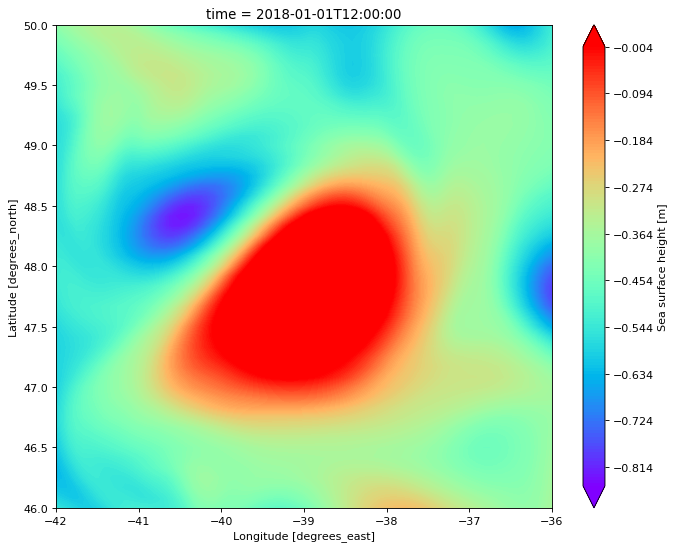

In [10]:
fig=plt.figure(figsize=(10,8), dpi= 80, facecolor='w', edgecolor='w', )
levels = np.arange(-0.85,-0,0.006)
height[0].plot.contourf(add_colorbar=True, levels=levels, cmap='rainbow', xlim=[-1,-0.3], ylim=[64.7, 65.8])
plt.xlim(-42,-36)
plt.ylim(46, 50)

In [11]:
phase_angle.rename('phase_angle')
phase_angle.to_netcdf('C:/Master/data/cmems_data/global_10km/phase_angle_001.nc')

phase_angle_interp.rename('phase_angle_interp')
phase_angle_interp.to_netcdf('C:/Master/data/cmems_data/global_10km/phase_angle_interp_001.nc')

In [12]:
fpath = 'C:/Master/data/tracks_AVISO_DT2014_daily_web.nc'
ds = xr.open_dataset(fpath)

(45, 60)

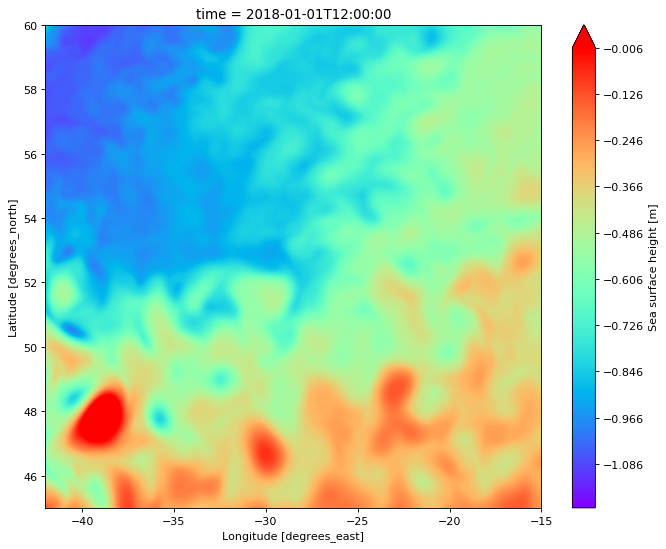

In [13]:
fig=plt.figure(figsize=(10,8), dpi= 80, facecolor='w', edgecolor='w', )
levels = np.arange(-1.2,-0,0.006)
height[0].plot.contourf(add_colorbar=True, levels=levels, cmap='rainbow', xlim=[-1,-0.3], ylim=[64.7, 65.8])
plt.xlim(-42,-15)
plt.ylim(45, 60)

(58.1, 60)

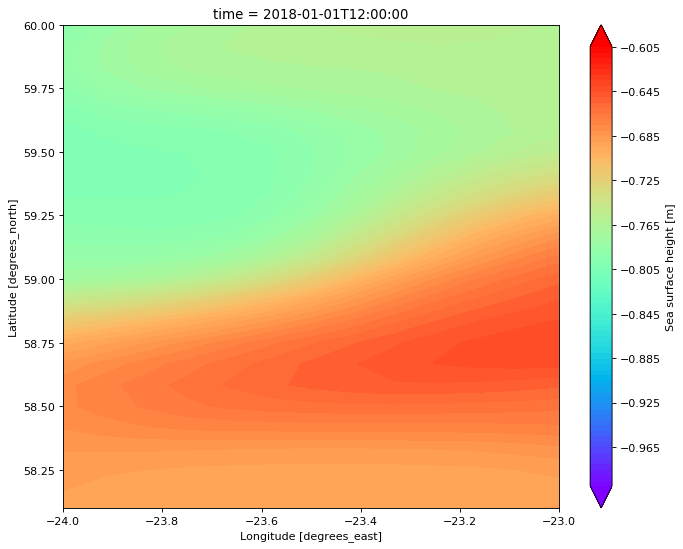

In [14]:
fig=plt.figure(figsize=(10,8), dpi= 80, facecolor='w', edgecolor='w', )
levels = np.arange(-1,-0.6,0.005)
height[0].plot.contourf(add_colorbar=True, levels=levels, cmap='rainbow', xlim=[-1,-0.3], ylim=[64.7, 65.8])
plt.xlim(-35,-33)
plt.ylim(58, 58.6)
plt.xlim(-24,-23)
plt.ylim(58.1, 60)

In [3]:
import vegascope
import altair as alt
alt.renderers.enable('vegascope')

ValueError: 
To use the 'vegascope' renderer, you must install the vegascope
package; see http://github.com/diana-hep/vegascope/
for more information.
